In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import joblib

### data set loading 

In [2]:
print("Loading dataset...")

data_path = "/home/kali/Downloads/train.csv"
data = pd.read_csv(data_path)

print("Dataset Loaded Successfully!")
print("Dataset Shape:", data.shape)

Loading dataset...
Dataset Loaded Successfully!
Dataset Shape: (151165, 42)


### renameing class to lables

In [3]:
data.rename(columns={"class": "label"}, inplace=True)

### Encoding categorical columns

In [4]:
categorical_cols = ["protocol_type", "service", "flag"]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print("Categorical columns encoded successfully.")

Categorical columns encoded successfully.


### Convert lables to binary

In [5]:
# normal = 0
# anomaly = 1

data["label"] = data["label"].map({"normal": 0, "anomaly": 1})

if data["label"].isnull().sum() > 0:
    print("Warning: Some labels were not mapped properly!")

### Class distribution

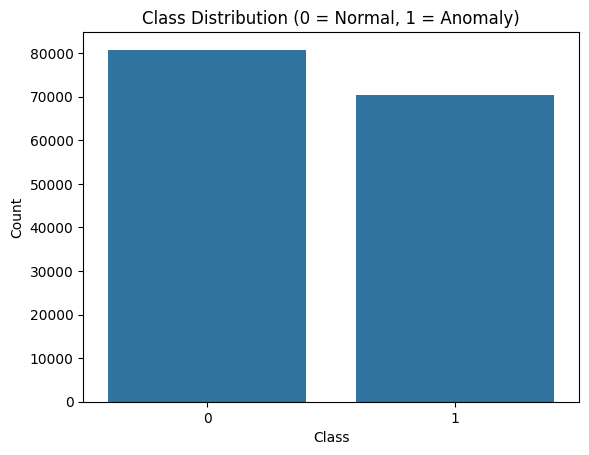

In [6]:
plt.figure()
sns.countplot(x=data["label"])
plt.title("Class Distribution (0 = Normal, 1 = Anomaly)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


### Separate features and lables

In [7]:
X = data.drop("label", axis=1)
y = data["label"]

### scaling feartures

In [8]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed.")

Feature scaling completed.


### Train with isolation forest

In [9]:
print("Training Isolation Forest model...")

model = IsolationForest(
    n_estimators=100,
    contamination=0.1,
    random_state=42
)

model.fit(X_scaled)

print("Model Training Completed!")

Training Isolation Forest model...
Model Training Completed!


### Evaluate model

In [10]:
# Isolation Forest output:
#  1 = normal
# -1 = anomaly

# Convert to 0/1 format
y_pred = model.predict(X_scaled)
y_pred = np.where(y_pred == -1, 1, 0)


print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))


Confusion Matrix:
[[75134  5658]
 [60919  9454]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.93      0.69     80792
           1       0.63      0.13      0.22     70373

    accuracy                           0.56    151165
   macro avg       0.59      0.53      0.46    151165
weighted avg       0.59      0.56      0.47    151165



### Confusion matrix graph

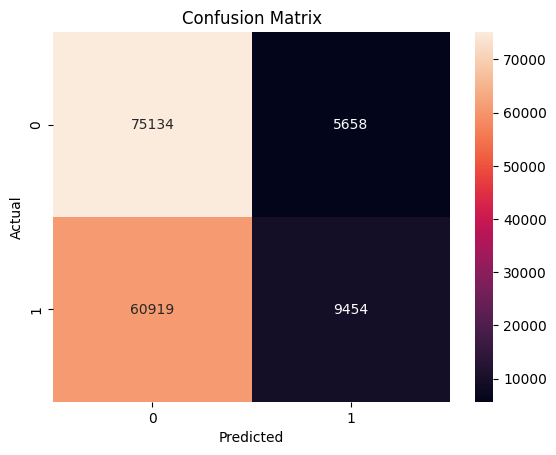

In [11]:
cm = confusion_matrix(y, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### save this model

In [12]:
joblib.dump({
    "model": model,
    "scaler": scaler,
    "encoders": label_encoders
}, "saved_model.pkl")

print("\nModel saved successfully as saved_model.pkl")


Model saved successfully as saved_model.pkl
